In [9]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [89]:
cols = ['FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO','CS_SEXO','PUERPERA','CARDIOPATI',
       'HEMATOLOGI','SIND_DOWN','HEPATICA','ASMA','DIABETES','NEUROLOGIC','PNEUMOPATI','IMUNODEPRE','RENAL','OBESIDADE','CLASSI_FIN','TP_IDADE']

cols = [item.lower() for item in cols]

df = pa.read_csv('covid_2020.csv', engine='python',sep=';',usecols=cols).loc[0:200]

In [102]:
df['puerpera'].fillna(value=2, inplace=True)
df['diarreia'].fillna(value=2, inplace=True)
df['diabetes'].fillna(value=2, inplace=True)
df['pneumopati'].fillna(value=2, inplace=True)
df['cs_sexo'].replace({"M": 0, "F": 1, "I":-1}, inplace=True)
df['obesidade'].fillna(value=2, inplace=True)
df['neurologic'].fillna(value=2, inplace=True)
df['asma'].fillna(value=2, inplace=True)
df['hepatica'].fillna(value=2, inplace=True)
df['saturacao'].fillna(value=2, inplace=True)
df['cardiopati'].fillna(value=2, inplace=True)
df['febre'].fillna(value=2, inplace=True)
df['imunodepre'].fillna(value=2, inplace=True)
df['renal'].fillna(value=2, inplace=True)
df['dispneia'].fillna(value=2, inplace=True)
df['desc_resp'].fillna(value=2, inplace=True)
df['sind_down'].fillna(value=2, inplace=True)
df['hematologi'].fillna(value=2, inplace=True)
df['tosse'].fillna(value=2, inplace=True)
df['garganta'].fillna(value=2, inplace=True)
df['vomito'].fillna(value=2, inplace=True)
df['classi_fin'].fillna(value=0, inplace=True)


pa.to_numeric(df['cs_sexo'])

df

,vomito,tp_idade,cs_sexo,evolucao,puerpera,diarreia,pneumopati,diabetes,obesidade,neurologic,...,tosse,hematologi,sind_down,desc_resp,dispneia,renal,classi_fin,imunodepre,febre,cardiopati
0,2.0,3,1,9.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0
1,2.0,3,0,9.0,2.0,2.0,2.0,1.0,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,0.0,2.0,2.0,1.0
2,2.0,3,1,2.0,2.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,1.0,2.0
3,2.0,3,0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,1.0,2.0,5.0,2.0,1.0,1.0
4,2.0,3,0,9.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2.0,3,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,1.0
197,2.0,3,0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,2.0
198,2.0,3,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0
199,2.0,3,1,1.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0


In [111]:
#df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   vomito      201 non-null    float64
 1   tp_idade    201 non-null    int64  
 2   cs_sexo     201 non-null    int64  
 3   evolucao    201 non-null    float64
 4   puerpera    201 non-null    float64
 5   diarreia    201 non-null    float64
 6   pneumopati  201 non-null    float64
 7   diabetes    201 non-null    float64
 8   obesidade   201 non-null    float64
 9   neurologic  201 non-null    float64
 10  asma        201 non-null    float64
 11  hepatica    201 non-null    float64
 12  saturacao   201 non-null    float64
 13  garganta    201 non-null    float64
 14  tosse       201 non-null    float64
 15  hematologi  201 non-null    float64
 16  sind_down   201 non-null    float64
 17  desc_resp   201 non-null    float64
 18  dispneia    201 non-null    float64
 19  renal       201 non-null    f

In [104]:
kmeans = KMeans(n_clusters=3, random_state=0)



In [105]:
y_teste = kmeans.fit(df)
y_teste.labels_

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [107]:
df['Kclasses']=y_teste.labels_.tolist()

In [108]:
df['Kclasses']

0      1
1      1
2      0
3      0
4      1
      ..
196    0
197    0
198    0
199    0
200    0
Name: Kclasses, Length: 201, dtype: int64

In [72]:
correlation = dx.corr()
correlation

,vomito,tp_idade,cs_sexo,evolucao,puerpera,diarreia,pneumopati,diabetes,obes_imc,neurologic,...,hematologi,sind_down,desc_resp,dispneia,renal,classi_fin,imunodepre,febre,cardiopati,Kclasses
vomito,1.000000,0.001055,0.013541,0.038868,0.253100,0.805566,0.302392,0.193254,-0.000995,0.320657,...,0.337197,0.330344,0.358450,0.267460,0.305940,0.004687,0.312864,0.313956,0.157973,0.030081
tp_idade,0.001055,1.000000,0.001046,0.005298,0.002984,-0.000635,0.004140,0.002082,0.001254,0.008506,...,0.009275,0.002715,0.002771,-0.005972,0.001378,-0.002231,0.002315,-0.002050,0.002183,0.002164
cs_sexo,0.013541,0.001046,1.000000,0.002725,-0.011647,0.024386,0.006352,-0.017155,-0.001230,0.017684,...,0.030824,0.017033,0.015529,0.014571,0.020569,-0.076894,0.018699,0.071591,-0.016914,0.036172
evolucao,0.038868,0.005298,0.002725,1.000000,0.010177,0.044053,0.022184,-0.010987,-0.005703,0.035704,...,0.042603,0.037221,-0.022640,-0.017112,0.022052,0.025915,0.038784,0.053734,-0.018583,0.030133
puerpera,0.253100,0.002984,-0.011647,0.010177,1.000000,0.230924,0.572079,0.421615,-0.027518,0.593585,...,0.601434,0.655978,0.184593,0.115657,0.577574,0.016691,0.604877,0.125135,0.389691,0.035343
diarreia,0.805566,-0.000635,0.024386,0.044053,0.230924,1.000000,0.276463,0.164331,0.004256,0.280765,...,0.306575,0.306947,0.331599,0.262866,0.268527,-0.025525,0.293832,0.315701,0.121387,0.029162
pneumopati,0.302392,0.004140,0.006352,0.022184,0.572079,0.276463,1.000000,0.560875,-0.014573,0.838118,...,0.843510,0.770585,0.188029,0.122922,0.780313,0.034982,0.845963,0.162047,0.517129,0.032079
diabetes,0.193254,0.002082,-0.017155,-0.010987,0.421615,0.164331,0.560875,1.000000,-0.023804,0.576332,...,0.563032,0.555773,0.164964,0.105750,0.547436,0.029340,0.568279,0.072823,0.523999,0.027496
obes_imc,-0.000995,0.001254,-0.001230,-0.005703,-0.027518,0.004256,-0.014573,-0.023804,1.000000,-0.020207,...,-0.018476,-0.025702,-0.016180,-0.013143,-0.019925,0.023405,-0.023017,0.001625,-0.024961,-0.408471
neurologic,0.320657,0.008506,0.017684,0.035704,0.593585,0.280765,0.838118,0.576332,-0.020207,1.000000,...,0.878910,0.796545,0.186776,0.129417,0.808471,0.019009,0.876169,0.184187,0.534478,0.044295


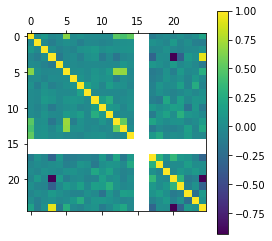

In [109]:
correlation_frame = df.corr(method='pearson')
plt.matshow(correlation_frame)
plt.colorbar()
plt.show()

vomito        1229
tp_idade         0
cs_sexo          0
evolucao         0
puerpera         0
diarreia         0
pneumopati       0
diabetes         0
obes_imc      2984
obesidade     2236
neurologic    2242
asma          2228
hepatica      2234
saturacao     1043
garganta      1101
tosse          402
hematologi    2251
sind_down     2249
desc_resp     1017
dispneia       437
renal         2228
classi_fin     563
imunodepre    2210
febre          424
cardiopati    1953
dtype: int64